In [1]:
import ROOT
import root_numpy as rnp
import uproot
import os
import pandas as pd
import utils
from data_retriever import get_df_safe, flatten_vector_branches
import sys
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.14/04


Using TensorFlow backend.


In [2]:
def get_file_list(): 
    signal_files = ["mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root", \
                    "mc16_13TeV.346228.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_ZZ4lep_notau.root"]
    background_files = ["mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root",\
                        "mc16_13TeV.364251.Sherpa_222_NNPDF30NNLO_llll_m4l100_300_filt100_150.root",\
                        "mc16_13TeV.364252.Sherpa_222_NNPDF30NNLO_llll_m4l300.root"]
    location = "/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/__CAMPAIGN__/Nominal/"

    full_signal_files = []
    for s in signal_files:
        for campaign in ["mc16a", "mc16d", "mc16e"]:
            full_signal_files.append(os.path.join(location.replace("__CAMPAIGN__", campaign), s))
    full_bkg_files = []
    for b in background_files:
        for campaign in ["mc16a", "mc16d", "mc16e"]:
            full_bkg_files.append(os.path.join(location.replace("__CAMPAIGN__", campaign), b))
            
    return full_signal_files, full_bkg_files
            

def get_signal_variables(variable_list, full_signal_files_list): 
    variables_to_retrieve = variable_list
    #Lets make a signal and background plot:
    signal_dataframe = []
    for sf in full_signal_files_list:
        #concatenate the dataframes together
        signal_dataframe.append(get_df_safe(uproot.open(sf), "tree_incl_all", variables_to_retrieve + ["weight", "event_type"])[0])
    import pandas as pd
    signal_dataframe = pd.concat(signal_dataframe) 
    
    return signal_dataframe 

def get_bkg_variables(variable_list, full_bkg_files_list): 
    variables_to_retrieve = variable_list
    background_dataframe = []
    for bf in full_bkg_files_list:
        #concatenate the dataframes together
        background_dataframe.append(get_df_safe(uproot.open(bf), "tree_incl_all", variables_to_retrieve + ["weight", "event_type"])[0])
    import pandas as pd
    background_dataframe = pd.concat(background_dataframe)
    
    return background_dataframe 

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


## Setup Dataloading

In [57]:
# full_signal_files, full_bkg_files = get_file_list()
# variable_list = ["lepton_pt",\
#                 "lepton_pt_truth_born",\
#                 #"lepton_pt_truth_matched_bare",\
#                 "lepton_eta",\
#                 "lepton_eta_truth_born",\
#                 #"lepton_eta_truth_matched_bare",\
#                 "lepton_phi",\
#                 "lepton_phi_truth_born",\
#                 "lepton_m",\
#                 "lepton_m_truth_born",\
#                 "m4l_unconstrained",\
#                 "m4l_truth_born"] 

# signal_dataframe = get_signal_variables(variable_list, full_signal_files)
# bkg_dataframe = get_bkg_variables(variable_list, full_bkg_files)

Frame retrieval took 5.039566993713379 seconds
Frame retrieval took 6.43556809425354 seconds
Frame retrieval took 8.674530267715454 seconds
Frame retrieval took 6.538758993148804 seconds
Frame retrieval took 7.174478054046631 seconds
Frame retrieval took 7.396608829498291 seconds
Frame retrieval took 6.310563802719116 seconds
Frame retrieval took 10.052197217941284 seconds
Frame retrieval took 7.80472469329834 seconds
Frame retrieval took 6.880840301513672 seconds
Frame retrieval took 6.294172048568726 seconds
Frame retrieval took 10.327960968017578 seconds
Frame retrieval took 6.210906505584717 seconds
Frame retrieval took 6.183442831039429 seconds
Frame retrieval took 9.607847213745117 seconds


In [58]:
# signal_dataframe.to_pickle('signal_dataframe_pt-eta_truth_born.pkl')
# bkg_dataframe.to_pickle('bkg_dataframe_pt-eta_truth_born.pkl')



In [3]:
signal_dataframe = pd.read_pickle('signal_dataframe_pt-eta_truth_matched_bare.pkl')
bkg_dataframe = pd.read_pickle('bkg_dataframe_pt-eta_truth_matched_bare.pkl')

# signal_dataframe = pd.read_pickle('signal_dataframe_pt-eta_truth_born.pkl')
# bkg_dataframe = pd.read_pickle('bkg_dataframe_pt-eta_truth_born.pkl')

In [4]:
signal_dataframe_lepton1_mu = signal_dataframe.query("subentry==0 and event_type == 0") #the first muon
signal_dataframe_lepton2_mu = signal_dataframe.query("subentry==1 and event_type == 0") #the second muon
signal_dataframe_lepton3_mu = signal_dataframe.query("subentry==2 and event_type == 0") #the third muon
signal_dataframe_lepton4_mu = signal_dataframe.query("subentry==3 and event_type == 0") #the fourth muon
signal_dataframe_4l_mu = pd.concat([signal_dataframe_lepton1_mu, signal_dataframe_lepton2_mu, signal_dataframe_lepton3_mu, signal_dataframe_lepton4_mu])

signal_dataframe_lepton1_e = signal_dataframe.query("subentry==0 and event_type == 1") #the first electron
signal_dataframe_lepton2_e = signal_dataframe.query("subentry==1 and event_type == 1") #the second electron
signal_dataframe_lepton3_e = signal_dataframe.query("subentry==2 and event_type == 1") #the third electron
signal_dataframe_lepton4_e = signal_dataframe.query("subentry==3 and event_type == 1") #the fourth electron
signal_dataframe_4l_e = pd.concat([signal_dataframe_lepton1_e, signal_dataframe_lepton2_e, signal_dataframe_lepton3_e, signal_dataframe_lepton4_e])

bkg_dataframe_lepton1_mu = bkg_dataframe.query("subentry==0 and event_type == 0") #the first muon
bkg_dataframe_lepton2_mu = bkg_dataframe.query("subentry==1 and event_type == 0") #the second muon
bkg_dataframe_lepton3_mu = bkg_dataframe.query("subentry==2 and event_type == 0") #the third muon
bkg_dataframe_lepton4_mu = bkg_dataframe.query("subentry==3 and event_type == 0") #the fourth muon
bkg_dataframe_4l_mu = pd.concat([bkg_dataframe_lepton1_mu, bkg_dataframe_lepton2_mu, bkg_dataframe_lepton3_mu, bkg_dataframe_lepton4_mu])

bkg_dataframe_lepton1_e = bkg_dataframe.query("subentry==0 and event_type == 1") #the first electron
bkg_dataframe_lepton2_e = bkg_dataframe.query("subentry==1 and event_type == 1") #the second electron
bkg_dataframe_lepton3_e = bkg_dataframe.query("subentry==2 and event_type == 1") #the third electron
bkg_dataframe_lepton4_e = bkg_dataframe.query("subentry==3 and event_type == 1") #the fourth electron
bkg_dataframe_4l_e = pd.concat([bkg_dataframe_lepton1_e, bkg_dataframe_lepton2_e, bkg_dataframe_lepton3_e, bkg_dataframe_lepton4_e])



In [5]:
signal_dataframe_4l_mu["x_pt"] = (signal_dataframe_4l_mu["lepton_pt"]-signal_dataframe_4l_mu["lepton_pt_truth_matched_bare"])/signal_dataframe_4l_mu["lepton_pt_truth_matched_bare"]
signal_dataframe_4l_e["x_pt"] = (signal_dataframe_4l_e["lepton_pt"]-signal_dataframe_4l_e["lepton_pt_truth_matched_bare"])/signal_dataframe_4l_e["lepton_pt_truth_matched_bare"]
bkg_dataframe_4l_mu["x_pt"] = (bkg_dataframe_4l_mu["lepton_pt"]-bkg_dataframe_4l_mu["lepton_pt_truth_matched_bare"])/bkg_dataframe_4l_mu["lepton_pt_truth_matched_bare"]
bkg_dataframe_4l_e["x_pt"] = (bkg_dataframe_4l_e["lepton_pt"]-bkg_dataframe_4l_e["lepton_pt_truth_matched_bare"])/bkg_dataframe_4l_e["lepton_pt_truth_matched_bare"]

#signal_dataframe_4l["x_eta"] = (signal_dataframe_4l["lepton_eta"]-signal_dataframe_4l["lepton_eta_truth_born"])/signal_dataframe_4l["lepton_eta_truth_born"]
#signal_dataframe_4l["x_m"] = (signal_dataframe_4l["lepton_m"]-signal_dataframe_4l["lepton_m_truth_born"])/signal_dataframe_4l["lepton_m_truth_born"]

#signal_dataframe_lepton1["x_m4l"] = (signal_dataframe_lepton1["m4l_unconstrained"]-signal_dataframe_lepton1["m4l_truth_born"])/signal_dataframe_lepton1["m4l_truth_born"]


### Make some quick plots of general x distribution (muons)

Text(0.5, 1.0, 'muon x_pt distribution')

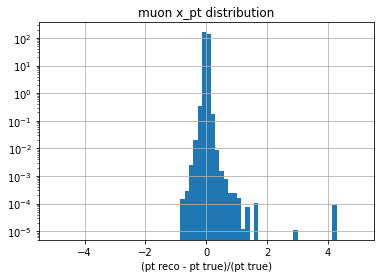

In [7]:
# quick plots to see if x_pt is correlated with x_m
#plt.plot(signal_dataframe_4l["x_pt"], signal_dataframe_4l["x_m"],marker='.',color='b',linestyle='')
plt.hist(signal_dataframe_4l_mu["x_pt"], weights=signal_dataframe_4l_mu['weight'], range = [-5, 5], bins=70)
plt.yscale('log', nonposy='clip')
#plt.xlim(-5, 5)
#plt.ylim(-5,5)
plt.grid()
plt.xlabel("(pt reco - pt true)/(pt true)")
plt.title("muon x_pt distribution")

In [10]:
# plt.hist(signal_dataframe_4l_mu["x_m"], weights=signal_dataframe_4l_mu['weight'], range = [-5, 5], bins=70)
# plt.yscale('log', nonposy='clip')
# plt.grid()
# plt.xlabel("(m reco - m true)/(m true)")
# plt.title("muon x_m distribution")

## More detailed analysis based on pt/eta bins

In [11]:
#make a function for plotting, fitting, and finding statistics about certain pt and eta slices
def slice_x_plot(frame,low_pt, high_pt, eta_small, eta_large, plot=False, k=0): 
    bins = np.linspace(-0.15, +0.15, 50)
    #lets plot this in an eta and pt slice and limit x to under 0.10 to get rid of outliers
    selected_frame = frame.loc[(frame['lepton_pt'] >= low_pt) & \
                               (frame['lepton_pt'] <= high_pt) & \
                               (abs(frame['lepton_eta']) <= eta_large) & \
                               (abs(frame['lepton_eta']) >= eta_small) & \
                               (abs(frame['x_pt']) <= 0.2 )] # don't include outliers
    if selected_frame.shape[0] >= 2:
        stdev = stat.stdev(selected_frame['x_pt'])
        mean = stat.mean(selected_frame['x_pt'])
    else: 
        stdev = 0
        mean = 0 
    
    #counts = selected_frame['weight'].sum()
    counts = selected_frame['weight'].shape[0]
    
    if plot == True: 
        plt.figure(k)
        plt.hist(selected_frame.eval("x_pt").values, weights = selected_frame.eval("weight"), bins=bins)
        x1,x2,y1,y2 = plt.axis()
        #plt.axis((x1,x2,0,4))
        plt.grid()
        plt.xlabel("(pt reco - pt true)/(pt true)")
        plt.title("pt range " + str(low_pt) + " - " + str(high_pt) + ", |eta| range " + str(eta_small) + "-" + str(eta_large) + ", counts = " + str(counts))  
    
    return mean, stdev, counts

def fit_x_plot(frame, low_pt, high_pt, eta_small, eta_large, plot=False, k=0): 
     
    bins = np.linspace(-0.15, +0.15, 50)
    #lets plot this in an eta and pt slice and limit x to under 0.10 to get rid of outliers
    selected_frame = frame.loc[(frame['lepton_pt'] >= low_pt) & \
                               (frame['lepton_pt'] <= high_pt) & \
                               (abs(frame['lepton_eta']) <= eta_large) & \
                               (abs(frame['lepton_eta']) >= eta_small) & \
                               (abs(frame['x_pt']) <= 0.2 )] # don't include outliers
    
        
    roo_x = ROOT.RooRealVar("x", "x", 0.0, -0.5, 0.5)
    roo_w = ROOT.RooRealVar("weight", "weight", 0.0, -10000000.0, 100000000.0)
    roo_xw = ROOT.RooArgSet(*[roo_x, roo_w])
    
    for_tree = np.core.records.fromarrays([selected_frame['x_pt'], selected_frame['weight']], names=",".join(["x","weight"]))
    tree_for_roodataset = rnp.array2tree(for_tree)
    
    x_dataset = ROOT.RooDataSet("Test", "Test", roo_xw, ROOT.RooFit.Import(tree_for_roodataset), ROOT.RooFit.WeightVar("weight"))
    #x_dataset.Print()
    mean = ROOT.RooRealVar("mean","mean",0.0,-0.05,0.05)
    sigma = ROOT.RooRealVar("sigma","sigma",0.1,0.0,0.5)
    gaus = ROOT.RooGaussian("Gaus", "Gaus", roo_x, mean, sigma)
    gaus.fitTo(x_dataset, ROOT.RooFit.Strategy(2), ROOT.RooFit.Range(-0.05, 0.05))
    
    xframe = roo_x.frame( ROOT.RooFit.Range(-0.2, 0.2) )
    xframe.GetXaxis().SetTitle("#frac{P^{Truth}_{T} - P^{Reco}_{T}}{P^{Reco}_{T}}")
    xframe.GetXaxis().SetTitleOffset(2.1)
    gaus.plotOn(xframe)
    x_dataset.plotOn(xframe)
    canvas = ROOT.TCanvas("canv", "canv")
    canvas.SetBottomMargin(0.3)
    xframe.Draw()
    canvas.Draw()
    
    

def get_x_matrix(frame, max_pt, max_eta, increment_pt, increment_eta): 
    pt_count = int(max_pt/increment_pt)
    eta_count = int(max_eta/increment_eta)
    
    mean_array = np.zeros((pt_count,eta_count))
    stdev_array = np.zeros((pt_count,eta_count))
    counts_array = np.zeros((pt_count,eta_count))
    
    for i in range(pt_count):
        for j in range(eta_count):
            mean, stdev, count = slice_x_plot(frame, increment_pt*i,increment_pt*i+increment_pt, increment_eta*j, increment_eta*j+increment_eta)
            mean_array[i,j] = mean
            stdev_array[i,j] = stdev
            counts_array[i,j] = count  
    
    mean_array = mean_array[::-1]
    stdev_array = stdev_array[::-1]
    counts_array = counts_array[::-1]
    
    return mean_array, stdev_array, counts_array
    
    
def plot_x_plot(array, max_pt, max_eta, label, log=False): 
    
    fig, ax = plt.subplots()
    if log == True: 
        im = ax.imshow(array,extent=[0,max_eta,0,max_pt], norm=LogNorm())
    else: 
        im = ax.imshow(array,extent=[0,max_eta,0,max_pt])
    ax.set_aspect(0.005)
    fig.set_size_inches(10,6)
    ax.set_xlabel("|eta|")
    ax.set_ylabel("pT")
    ax.set_title( label + " of [pT relative error distribution] in eta and pT bins")
    
    plt.colorbar(im,fraction=0.046, pad=0.04, label=label)

    fig.tight_layout()
    plt.show()


def get_x_matrix_nonuniform(frame, pt_axis_array, eta_axis_array): 
    pt_count = pt_axis_array.shape[0]-1
    eta_count = eta_axis_array.shape[0]-1
    
    mean_array = np.zeros((pt_count,eta_count))
    stdev_array = np.zeros((pt_count,eta_count))
    counts_array = np.zeros((pt_count,eta_count))
    
    for i in range(pt_count):
        for j in range(eta_count):
            mean, stdev, count = slice_x_plot(frame, pt_axis_array[i],pt_axis_array[i+1], eta_axis_array[j], eta_axis_array[j+1])
            mean_array[i,j] = mean
            stdev_array[i,j] = stdev
            counts_array[i,j] = count  
    
    mean_array = mean_array[::-1]
    stdev_array = stdev_array[::-1]
    counts_array = counts_array[::-1]
    
    return mean_array, stdev_array, counts_array
    
    
def plot_x_plot_nonuniform(array,max_pt, max_eta, pt_axis_array, eta_axis_array,label, log=False):
    
    fig, ax = plt.subplots()
    if log == True: 
        im = ax.imshow(array,extent=[0,max_eta,0,max_pt], norm=LogNorm())
    else: 
        im = ax.imshow(array,extent=[0,max_eta,0,max_pt])
    ax.set_aspect(0.005)
    fig.set_size_inches(10,6)
    ax.set_xlabel("|eta|")
    ax.set_ylabel("pT")
    ax.set_title( label + " of [pT relative error distribution] in eta and pT bins")
    
    x_label_list = str(eta_axis_array)
    y_label_list = str(pt_axis_array)

    ax.set_xticks(np.arange(len(eta_axis_array)))
    ax.set_yticks(np.arange(len(pt_axis_array)))
    
    plt.colorbar(im,fraction=0.046, pad=0.04, label=label)

    fig.tight_layout()
    plt.show()

    

In [8]:
slice_x_plot(signal_dataframe_4l_mu,0, 100, 0, 2.7, plot=False, k=0)

(-0.0017247106415246229, 0.028121400600386773, 4692703)

In [12]:
fit_x_plot(signal_dataframe_4l_mu,0, 20, 0, 2.7, plot=False, k=0)

[#1] INFO:Eval -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision
[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(Gaus) WARNING: a likelihood fit is request of what appears to be weighted data. 
       While the estimated values of the parameters will always be calculated taking the weights into account, 
       there are multiple ways to estimate the errors on these parameter values. You are advised to make an 
       explicit choice on the error calculation: 
           - Either provide SumW2Error(kTRUE), to calculate a sum-of-weights corrected HESSE error matrix 
             (error will be proportional to the number of events)
           - Or provide SumW2Error(kFALSE), to return errors from original HESSE error matrix
             (which will be proportional to the sum of the weights)
       If you want the errors to reflect the information contained in the provided dataset, choose kTRUE. 
       If you want the errors to reflect the precis

In [9]:
pt_axis_array_mu = [5,6.5,7.7,8.8,9.9,10.8,11.7,12.6,13.5,14.4,15.3,16.2,17.1,\
                 18,19,20,21.1,22.2,23.4,24.6,25.9,27.3,28.7,30.2,31.7,33.3,34.9,36.5,38.2,\
                 40,41.8,43.8,46,48.4,51.2,54.6,58,62,67,72,77,83,89,95,102,110,\
                 120,130,150,175,200,250,1000]

eta_axis_array_mu = [0, 0.1, 0.25, 0.4, 0.55, 0.7,0.85,1,1.15,1.30,1.45,1.6,1.75,1.9,\
                     2.05,2.2,2.35,2.5,2.7]

pt_axis_array_e = [7,8.6,10.1,11.4,12.7,13.9,15.1,16.3,17.6,19,20.4,21.9,\
                   23.5,25.2,26.9,28.7,30.6,32.5,34.5,36.5,38.6,40.8,43.1,45.7,48.7,52.3,57,\
                   63.6,69,74,80,86,93,100,110,120,140,160,200,250,1000]

eta_axis_array_e = [0, 0.15,0.2,0.45,0.6,0.8,1.2,1.37,1.52,1.6,1.75,1.9,\
                   2, 2.1,2.3,2.4,2.47]

pt_axis_array_mu = np.array(pt_axis_array_mu)
eta_axis_array_mu = np.array(eta_axis_array_mu)
pt_axis_array_e = np.array(pt_axis_array_e)
eta_axis_array_e = np.array(eta_axis_array_e)

eta_axis_array_e[5]

0.8

In [10]:
ptrange = 1000
etarange = 2.7

ptincrement = 20
etaincrement = 0.1

## Muons

### Signal 


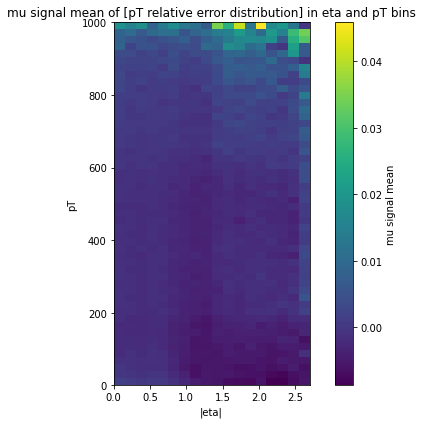

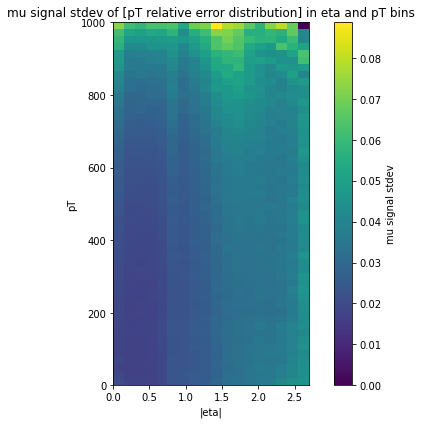

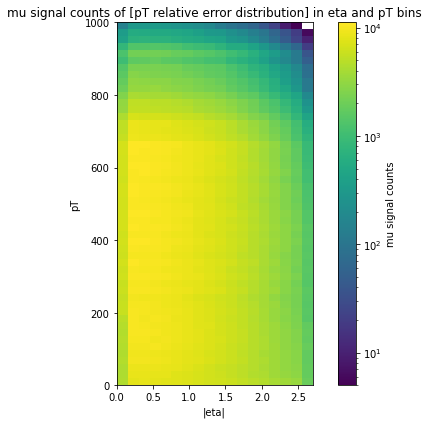

In [40]:

#mean_mu_sig, stdev_mu_sig, counts_mu_sig = get_x_matrix(signal_dataframe_4l_mu, ptrange, etarange, ptincrement, etaincrement)

#mean_mu_sig, stdev_mu_sig, counts_mu_sig = get_x_matrix_nonuniform(signal_dataframe_4l_mu, pt_axis_array_mu, eta_axis_array_mu)

plot_x_plot(mean_mu_sig, ptrange, etarange, "mu signal mean")

plot_x_plot(stdev_mu_sig, ptrange, etarange, "mu signal stdev")

plot_x_plot(counts_mu_sig, ptrange, etarange, "mu signal counts", log=True)


/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


IndexError: index 53 is out of bounds for axis 0 with size 53

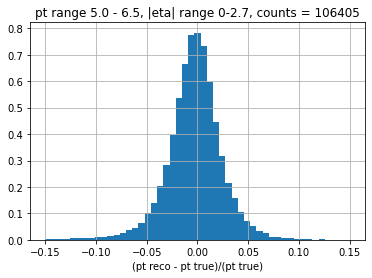

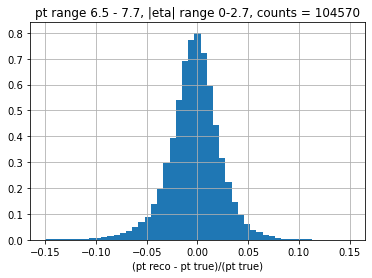

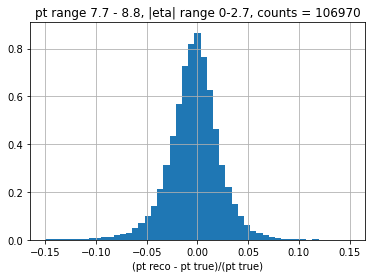

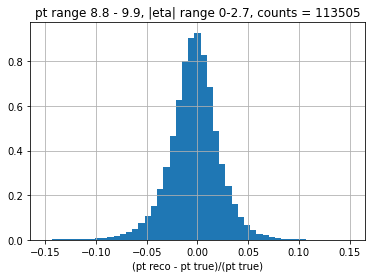

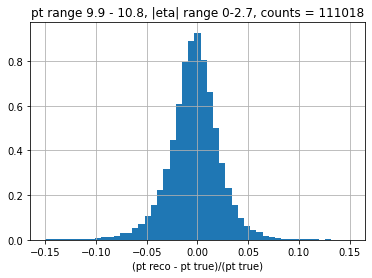

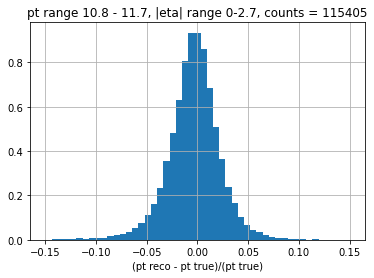

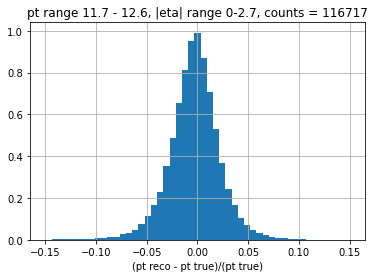

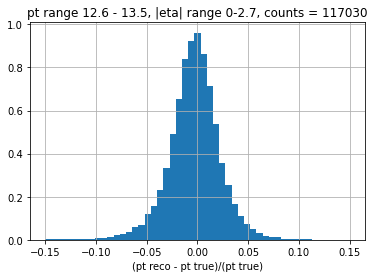

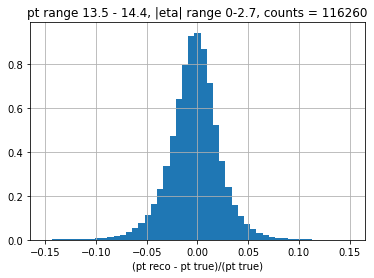

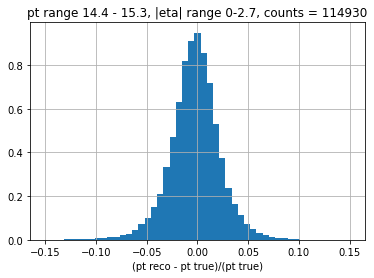

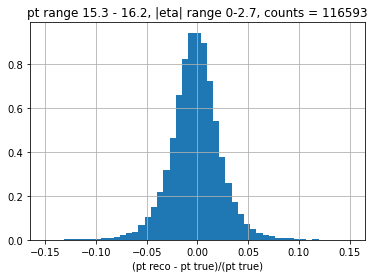

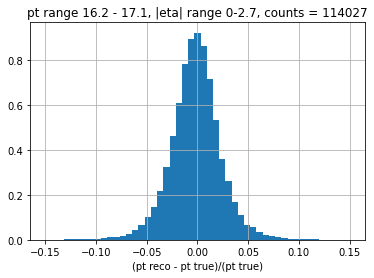

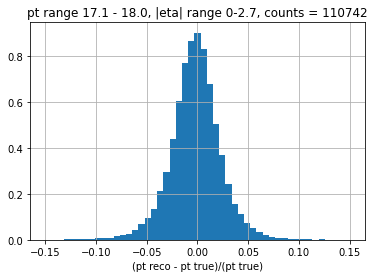

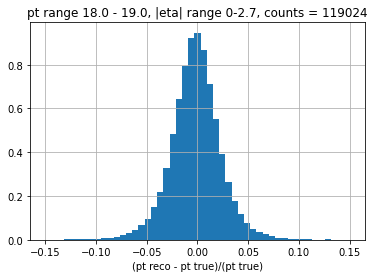

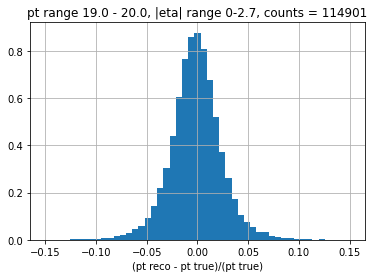

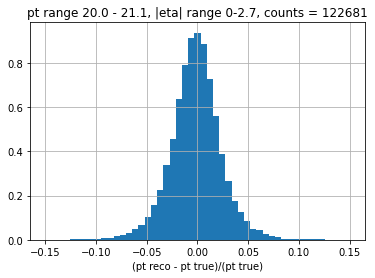

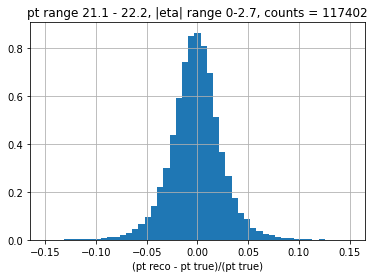

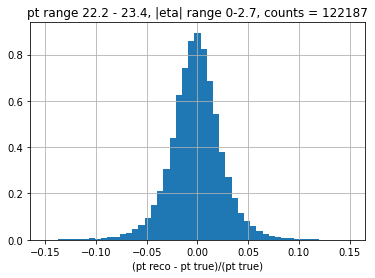

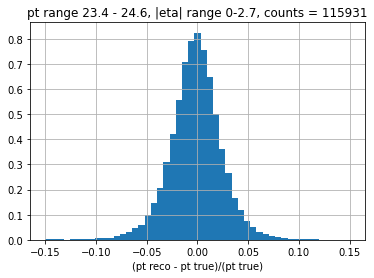

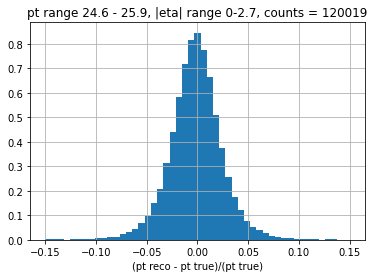

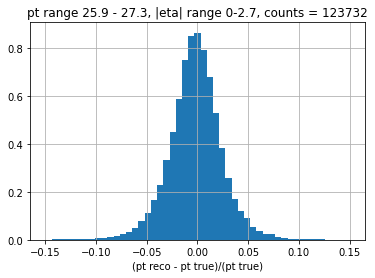

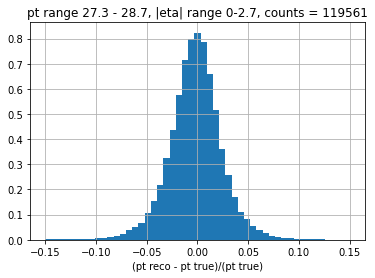

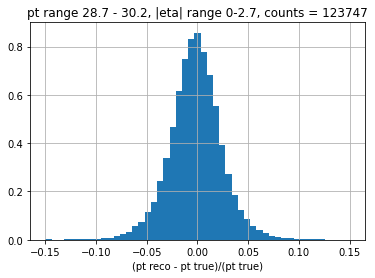

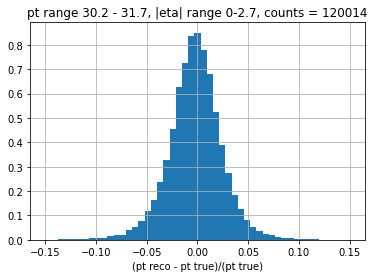

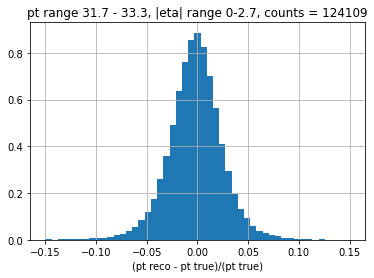

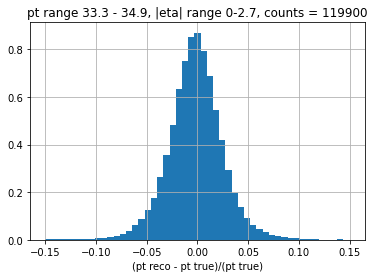

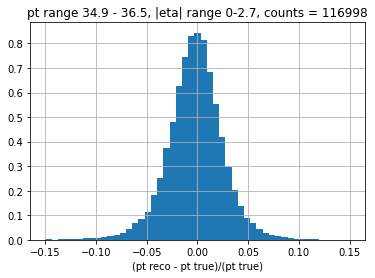

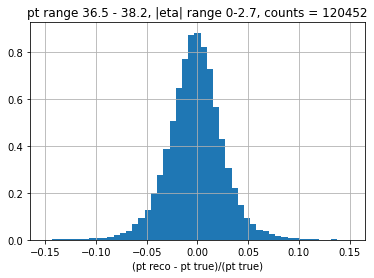

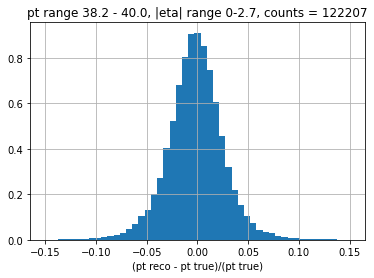

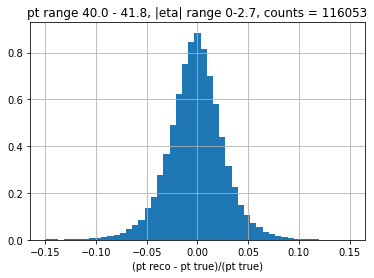

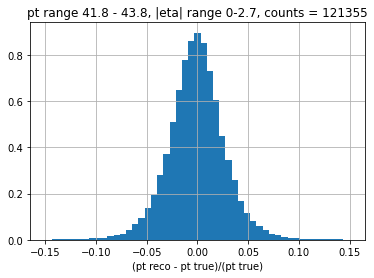

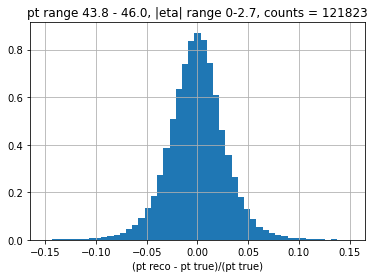

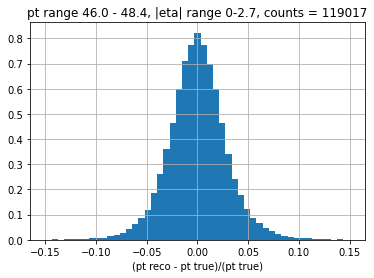

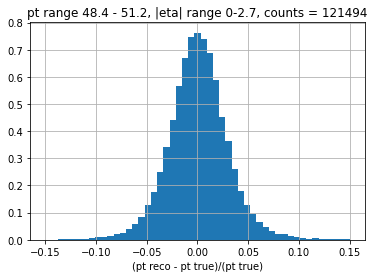

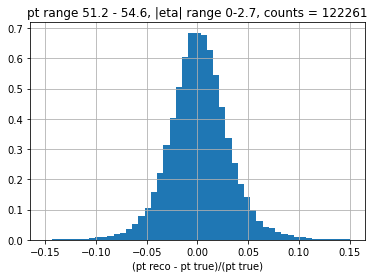

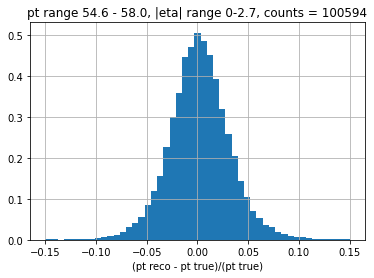

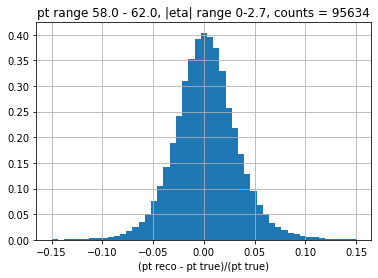

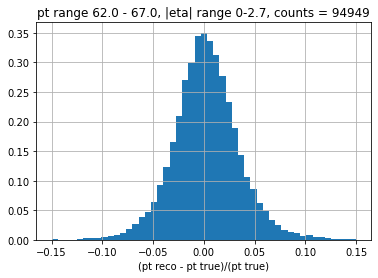

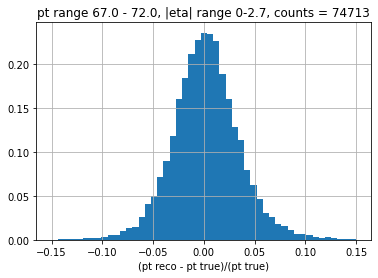

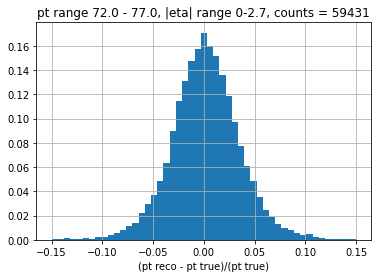

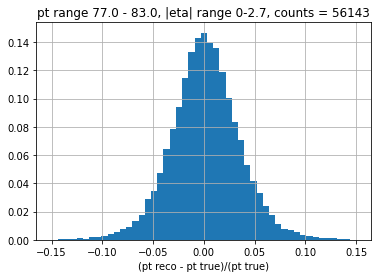

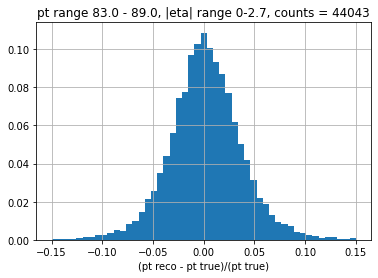

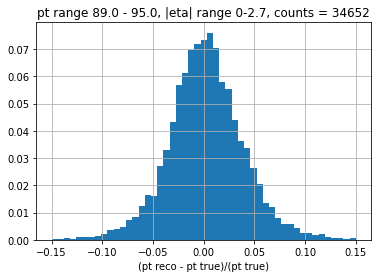

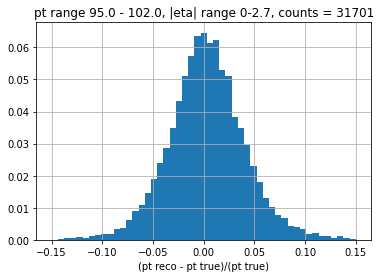

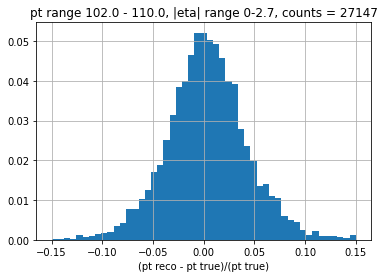

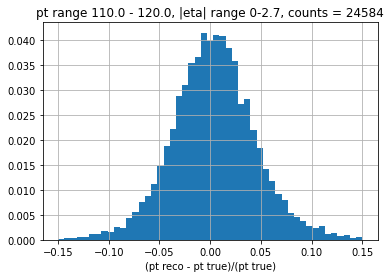

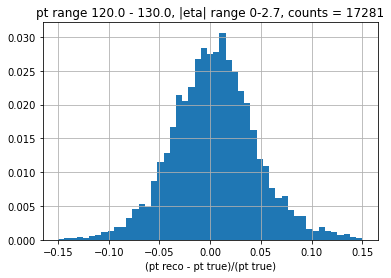

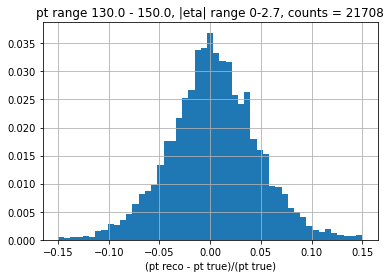

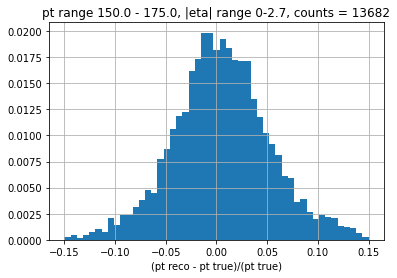

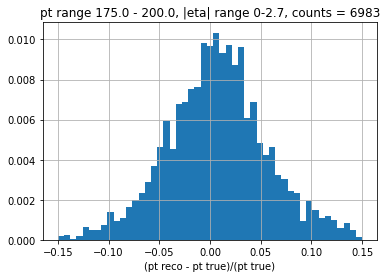

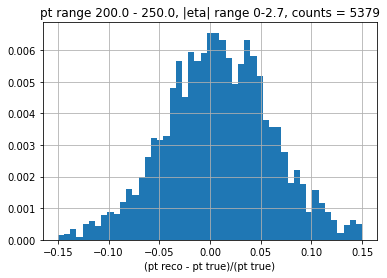

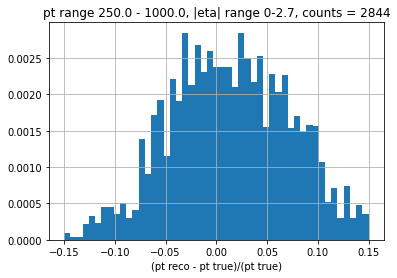

In [13]:
for i in range(len(pt_axis_array_mu)): 
    slice_x_plot(signal_dataframe_4l_mu,pt_axis_array_mu[i], pt_axis_array_mu[i+1], 0, 2.7, plot=True, k=i)

### Background

In [16]:
# mean_mu_bkg, stdev_mu_bkg, counts_mu_bkg = get_x_matrix(bkg_dataframe_4l_mu, ptrange, etarange, ptincrement, etaincrement)

# plot_x_plot(mean_mu_bkg, ptrange, etarange, "mu bkg mean")

# plot_x_plot(stdev_mu_bkg, ptrange, etarange, "mu bkg stdev")

# plot_x_plot(counts_mu_bkg, ptrange, etarange, "mu bkg counts", log=True)

In [17]:
# for i in range(int(ptrange/ptincrement)): 
#     slice_x_plot(signal_dataframe_4l_mu,i*ptincrement, i*ptincrement + ptincrement, 0,2.5, plot=True, k=i)

## Electrons

### Signal

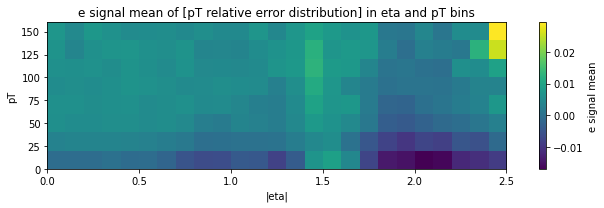

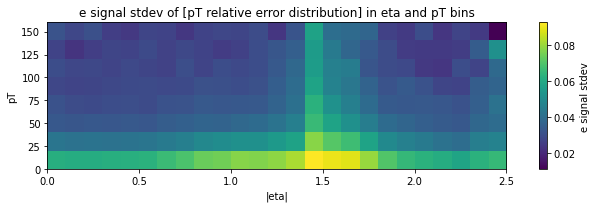

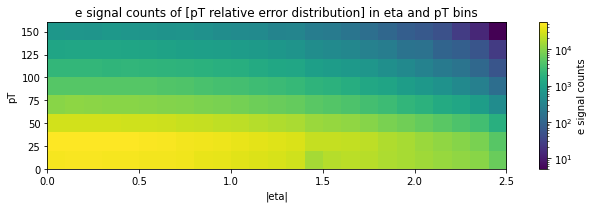

In [18]:

mean_e_sig, stdev_e_sig, counts_e_sig = get_x_matrix(signal_dataframe_4l_e, ptrange, etarange, ptincrement, etaincrement)

plot_x_plot(mean_e_sig, ptrange, etarange, "e signal mean")

plot_x_plot(stdev_e_sig, ptrange, etarange, "e signal stdev")

plot_x_plot(counts_e_sig, ptrange, etarange, "e signal counts", log=True)

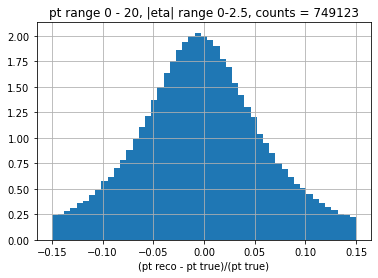

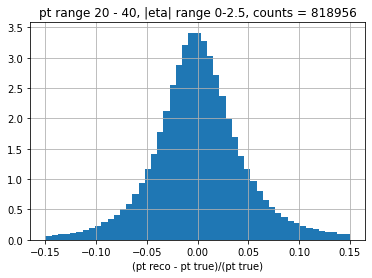

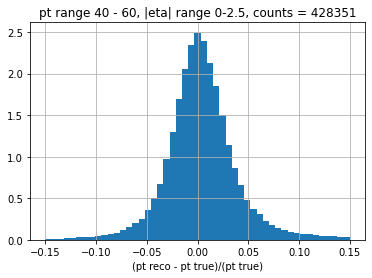

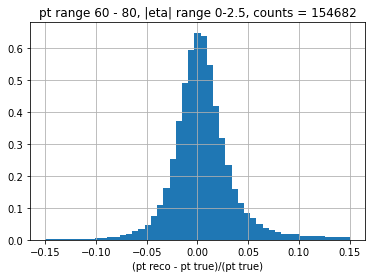

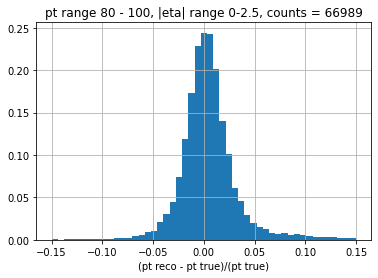

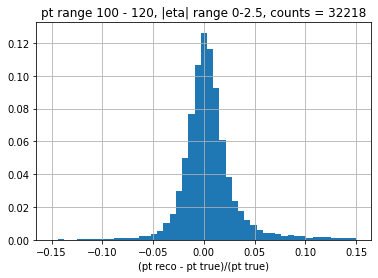

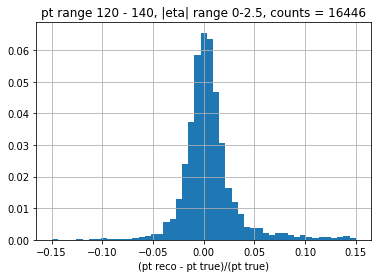

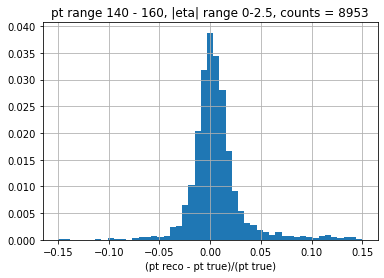

In [19]:
for i in range(int(ptrange/ptincrement)): 
    slice_x_plot(signal_dataframe_4l_e,i*ptincrement, i*ptincrement + ptincrement, 0, 2.5, plot=True, k=i)

### Background

In [20]:
# mean_e_bkg, stdev_e_bkg, counts_e_bkg = get_x_matrix(bkg_dataframe_4l_e, ptrange, etarange, ptincrement, etaincrement)

# plot_x_plot(mean_e_bkg, ptrange, etarange, "e bkg mean")

# plot_x_plot(stdev_e_bkg, ptrange, etarange, "e bkg stdev")

# plot_x_plot(counts_e_bkg, ptrange, etarange, "e bkg counts", log=True)

In [21]:
# for i in range(int(ptrange/ptincrement)): 
#     slice_x_plot(bkg_dataframe_4l_e,i*ptincrement, i*ptincrement + ptincrement, 0,2.5, plot=True, k=i)

## Scratch Space

In [22]:
ptrange = 160
etarange = 2.5

ptincrement = 5
etaincrement = 2.5

mean_mu_sig, stdev_mu_sig, counts_mu_sig = get_x_matrix(signal_dataframe_4l_mu, ptrange, etarange, ptincrement, etaincrement)
mean_e_sig, stdev_e_sig, counts_e_sig = get_x_matrix(signal_dataframe_4l_e, ptrange, etarange, ptincrement, etaincrement)


mean_mu_sig = mean_mu_sig[::-1]
mean_mu_sig = np.transpose(mean_mu_sig)
mean_e_sig = mean_e_sig[::-1]
mean_e_sig = np.transpose(mean_e_sig)


stdev_mu_sig = stdev_mu_sig[::-1]
stdev_mu_sig = np.transpose(stdev_mu_sig)
stdev_e_sig = stdev_e_sig[::-1]
stdev_e_sig = np.transpose(stdev_e_sig)

#h = ROOT.TH1D("h","Stdev of [pT relative error dist.] in pT slices", 10, 0, 160)


In [23]:
ptranges = np.zeros((1,int(ptrange/ptincrement)))

for i in range(int(ptrange/ptincrement)):
    ptranges[0][i] = ptincrement*i + 5
    

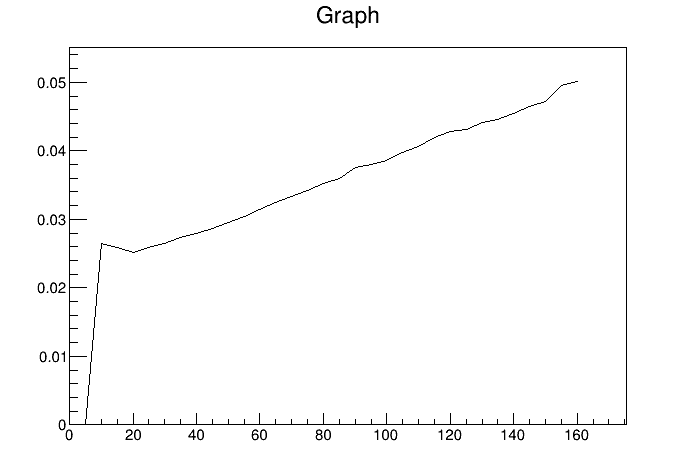

In [24]:
graph = ROOT.TGraph(ptranges.shape[1], ptranges[0], stdev_mu_sig[0])
c1 = ROOT.TCanvas("","")
graph.Draw()
c1.Draw()

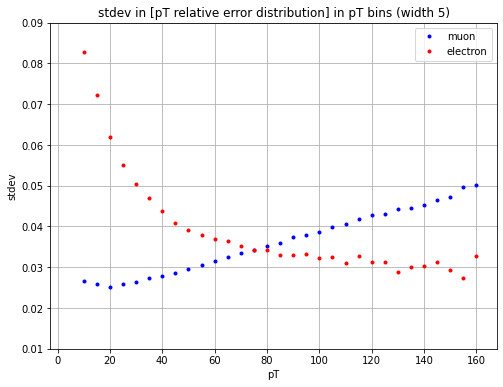

In [25]:
plt.figure(figsize=[8,6])
plt.plot(ptranges[0], stdev_mu_sig[0], marker='.',color='b',linestyle='', label='muon')
plt.plot(ptranges[0], stdev_e_sig[0], marker='.',color='r',linestyle='', label='electron')
plt.grid()
plt.ylim((0.01, 0.09))
plt.title("stdev in [pT relative error distribution] in pT bins (width 5)")
plt.xlabel("pT")
plt.ylabel("stdev")
plt.legend()
plt.show()

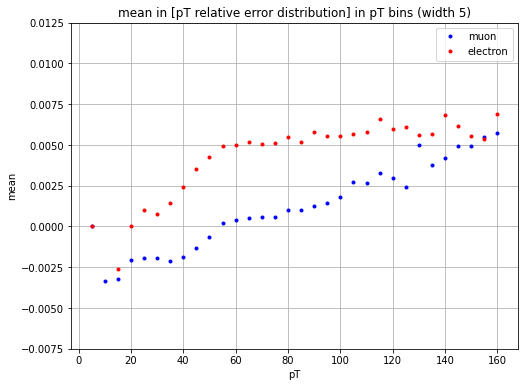

In [26]:
plt.figure(figsize=[8,6])
plt.plot(ptranges[0], mean_mu_sig[0], marker='.',color='b',linestyle='', label='muon')
plt.plot(ptranges[0], mean_e_sig[0], marker='.',color='r',linestyle='', label='electron')
plt.grid()
plt.ylim((-0.0075, 0.0125))
plt.title("mean in [pT relative error distribution] in pT bins (width 5)")
plt.xlabel("pT")
plt.ylabel("mean")
plt.legend()
plt.show()

In [27]:
ptranges.shape

(1, 32)

In [28]:
stdev_mu_sig[0]

array([0.        , 0.0265277 , 0.02581736, 0.02519433, 0.02589051,
       0.02649352, 0.02729453, 0.02795556, 0.02862438, 0.02952246,
       0.03044153, 0.03146625, 0.03245367, 0.03339478, 0.03424139,
       0.0352101 , 0.03602408, 0.03751314, 0.03800947, 0.03852872,
       0.03979373, 0.04063482, 0.04192866, 0.04279244, 0.04304895,
       0.04419777, 0.04456416, 0.04538952, 0.04649469, 0.04719818,
       0.04956474, 0.05012487])